<a href="https://colab.research.google.com/github/meghnapawle/mutual_fund_predictor/blob/main/mutualfundclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()
csv_name = list(uploaded.keys())[0]
df = pd.read_csv(csv_name)

Saving archive (1).zip to archive (1).zip


In [3]:
identifier_cols = ["scheme_name", "amc_name"]

In [4]:
df = df.dropna(subset=["returns_1yr", "returns_3yr", "returns_5yr"])

In [5]:
categorical_cols = ["fund_category", "risk_level"]
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

In [7]:
features = ["expense_ratio", "fund_size_cr", "sharpe", "beta", "alpha"]
features = [f for f in features if f in df.columns]

In [8]:
for col in features:
    if df[col].dtype == object:
        df[col] = df[col].replace('-', np.nan).astype(float)
df[features] = df[features].fillna(df[features].median())


In [9]:
df["top_fund_1yr"] = (df["returns_1yr"] >= df["returns_1yr"].quantile(0.7)).astype(int)
df["top_fund_3yr"] = (df["returns_3yr"] >= df["returns_3yr"].quantile(0.7)).astype(int)
df["top_fund_5yr"] = (df["returns_5yr"] >= df["returns_5yr"].quantile(0.7)).astype(int)
targets = ["top_fund_1yr", "top_fund_3yr", "top_fund_5yr"]


Training classifier for top_fund_1yr...
top_fund_1yr -> Accuracy: 0.8077, ROC-AUC: 0.8191


/tmp/ipython-input-3427531569.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


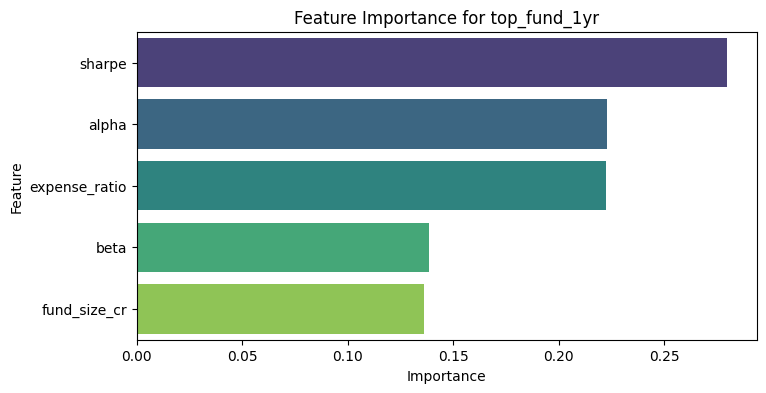


Training classifier for top_fund_3yr...
top_fund_3yr -> Accuracy: 0.9077, ROC-AUC: 0.9403


/tmp/ipython-input-3427531569.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


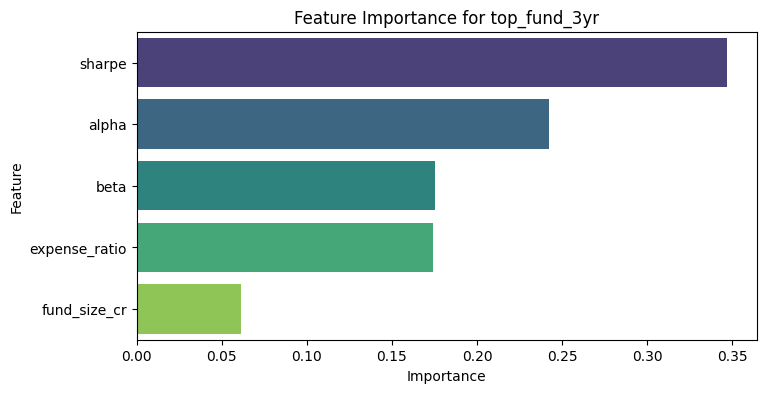


Training classifier for top_fund_5yr...
top_fund_5yr -> Accuracy: 0.8462, ROC-AUC: 0.9135


/tmp/ipython-input-3427531569.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette="viridis")


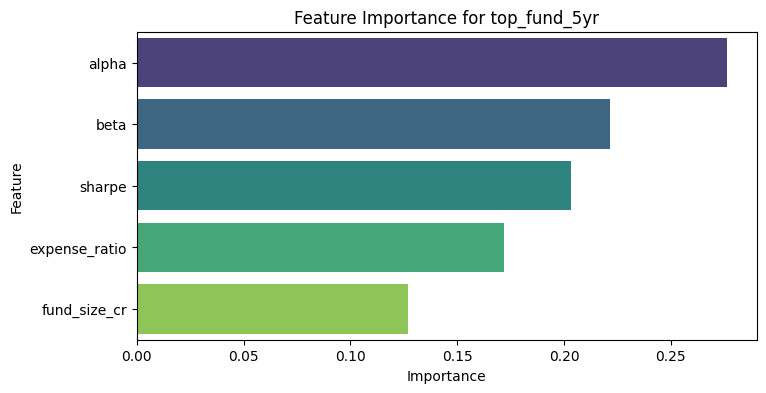


Top predicted funds for top_fund_1yr:


,scheme_name,amc_name,expense_ratio,fund_size_cr,sharpe,beta,alpha,top_fund_1yr_prob
660,SBI Savings Fund,SBI Mutual Fund,0.23,19441.0,1.93,1.19,2.73,0.977654
36,Aditya Birla SL Money Manager Fund,Aditya Birla Sun Life Mutual Fund,0.21,13095.0,1.94,1.31,3.06,0.977163
638,SBI Liquid Fund,SBI Mutual Fund,0.18,57052.0,0.88,0.76,1.35,0.977022
249,HDFC Money Market Fund,HDFC Mutual Fund,0.21,15176.0,1.89,1.33,3.08,0.974729
452,Kotak Liquid Fund,Kotak Mahindra Mutual Fund,0.15,33220.0,0.85,0.76,1.33,0.973063
792,UTI-Liquid – Cash Plan – Direct Growth,UTI Mutual Fund,0.14,31463.0,0.98,0.77,1.41,0.964729
690,Sundaram Liquid Fund,Sundaram Mutual Fund,0.17,4169.0,0.98,0.74,1.36,0.959053
160,DSP Liquidity Fund,DSP Mutual Fund,0.15,13582.0,0.83,0.73,1.29,0.954331
475,LIC MF Liquid Fund,LIC Mutual Fund,0.16,5996.0,0.97,0.73,1.33,0.954137
397,Invesco India Liquid Fund,Invesco Mutual Fund,0.15,6434.0,0.83,0.75,1.31,0.953027



Top predicted funds for top_fund_3yr:


,scheme_name,amc_name,expense_ratio,fund_size_cr,sharpe,beta,alpha,top_fund_3yr_prob
600,Quant Active Fund,Quant Mutual Fund,0.58,3531.0,1.87,0.97,13.82,0.991896
256,HDFC Small Cap Fund,HDFC Mutual Fund,0.80,14648.0,1.88,0.91,6.54,0.990403
601,Quant Flexi Cap Fund,Quant Mutual Fund,0.58,1044.0,1.94,0.91,15.93,0.987906
609,Quant Tax Plan- Direct Growth,Quant Mutual Fund,0.57,2779.0,2.03,0.96,17.63,0.986927
623,SBI Contra Fund,SBI Mutual Fund,0.91,8340.0,2.13,0.89,15.26,0.986499
294,HSBC Value Fund,HSBC Mutual Fund,0.84,7781.0,1.69,0.96,6.92,0.986437
571,Nippon India Small Cap Fund,Nippon India Mutual Fund,0.86,23910.0,2.06,0.89,10.01,0.986421
234,HDFC Focused 30 Fund,HDFC Mutual Fund,0.54,3609.0,1.71,0.92,7.78,0.986173
347,ICICI Pru Technology Fund,ICICI Prudential Mutual Fund,0.99,8993.0,1.48,0.92,9.30,0.985626
346,ICICI Pru Smallcap Fund,ICICI Prudential Mutual Fund,0.81,4618.0,1.94,0.82,8.49,0.985193



Top predicted funds for top_fund_5yr:


,scheme_name,amc_name,expense_ratio,fund_size_cr,sharpe,beta,alpha,top_fund_5yr_prob
571,Nippon India Small Cap Fund,Nippon India Mutual Fund,0.86,23910.0,2.06,0.89,10.01,0.976169
234,HDFC Focused 30 Fund,HDFC Mutual Fund,0.54,3609.0,1.71,0.92,7.78,0.967590
291,HSBC Small Cap Fund,HSBC Mutual Fund,0.77,8625.0,2.08,0.82,9.87,0.963178
459,Kotak Small Cap Fund,Kotak Mahindra Mutual Fund,0.59,8617.0,1.98,0.81,8.99,0.959333
308,ICICI Pru Dividend Yield Equity Fund,ICICI Prudential Mutual Fund,0.66,1258.0,1.94,0.83,10.39,0.956632
346,ICICI Pru Smallcap Fund,ICICI Prudential Mutual Fund,0.81,4618.0,1.94,0.82,8.49,0.953313
252,HDFC Retirement Savings Fund,HDFC Mutual Fund,0.78,2696.0,1.92,0.85,9.26,0.952792
623,SBI Contra Fund,SBI Mutual Fund,0.91,8340.0,2.13,0.89,15.26,0.952111
440,Kotak Equity Hybrid Fund,Kotak Mahindra Mutual Fund,0.58,3269.0,1.86,0.79,7.32,0.946690
578,Parag Parikh Flexi Cap Fund,PPFAS Mutual Fund,0.75,29953.0,1.86,0.70,10.65,0.944161


In [19]:
results = {}
for target in targets:
    print(f"\nTraining classifier for {target}...")
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(
        df[features], y, test_size=0.2, random_state=42, stratify=y
    )

    clf = RandomForestClassifier(n_estimators=300, max_depth=6, random_state=42)
    clf.fit(X_train, y_train)
    results[target] = clf


    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)
    print(f"{target} -> Accuracy: {acc:.4f}, ROC-AUC: {roc:.4f}")


    df[f"{target}_pred"] = clf.predict(df[features])
    df[f"{target}_prob"] = clf.predict_proba(df[features])[:, 1]


    importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=importances.values, y=importances.index, palette="viridis")
    plt.title(f"Feature Importance for {target}")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()


for target in targets:
    print(f"\nTop predicted funds for {target}:")
    top_funds = df[df[f"{target}_pred"]==1].sort_values(f"{target}_prob", ascending=False)
    display(top_funds[identifier_cols + features + [f"{target}_prob"]].head(10))


In [20]:
import pandas as pd

In [21]:
identifier_cols = ["scheme_name", "amc_name"]


In [22]:
top_fund_cols = ["top_fund_1yr_prob", "top_fund_3yr_prob", "top_fund_5yr_prob"]

In [23]:
top_1yr = df[df["top_fund_1yr_pred"]==1][identifier_cols + ["top_fund_1yr_prob"]]
top_3yr = df[df["top_fund_3yr_pred"]==1][identifier_cols + ["top_fund_3yr_prob"]]
top_5yr = df[df["top_fund_5yr_pred"]==1][identifier_cols + ["top_fund_5yr_prob"]]

In [24]:
combined_top = pd.merge(top_1yr, top_3yr, on=identifier_cols, how="outer")
combined_top = pd.merge(combined_top, top_5yr, on=identifier_cols, how="outer")

In [25]:
combined_top[top_fund_cols] = combined_top[top_fund_cols].fillna(0)

In [26]:
combined_top["consistency_score"] = combined_top[top_fund_cols].sum(axis=1)

In [27]:
combined_top = combined_top.sort_values("consistency_score", ascending=False)

In [28]:
display(combined_top.head(20))

,scheme_name,amc_name,top_fund_1yr_prob,top_fund_3yr_prob,top_fund_5yr_prob,consistency_score
199,Nippon India Small Cap Fund,Nippon India Mutual Fund,0.861877,0.986421,0.976169,2.824468
86,HDFC Small Cap Fund,HDFC Mutual Fund,0.882842,0.990403,0.923595,2.796840
103,ICICI Pru Equity & Debt Fund,ICICI Prudential Mutual Fund,0.890944,0.963505,0.906276,2.760726
117,ICICI Pru Multi-Asset Fund,ICICI Prudential Mutual Fund,0.867371,0.978743,0.905535,2.751649
67,HDFC Children’s Gift Fund,HDFC Mutual Fund,0.828858,0.972486,0.931916,2.733260
230,SBI Contra Fund,SBI Mutual Fund,0.792988,0.986499,0.952111,2.731598
234,SBI Large & Midcap Fund,SBI Mutual Fund,0.849822,0.982460,0.890297,2.722579
179,Motilal Oswal Midcap Fund,Motilal Oswal Mutual Fund,0.802823,0.973615,0.934961,2.711398
83,HDFC Retirement Savings Fund,HDFC Mutual Fund,0.771816,0.978889,0.952792,2.703496
126,ICICI Pru Smallcap Fund,ICICI Prudential Mutual Fund,0.759184,0.985193,0.953313,2.697690
